In [1]:
pwd

'C:\\Users\\atmik\\Documents\\10 Machine Learning'

In [2]:
cd D:\Data Scientist\Data Entry\ML\ML Model Practice\07_Logistic Regression

D:\Data Scientist\Data Entry\ML\ML Model Practice\07_Logistic Regression


In [3]:
# BINARY CLASSIFICATION

In [37]:
import pandas as pd
df = pd.read_csv('logistic_insurance_data.csv')
print(df.head())

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


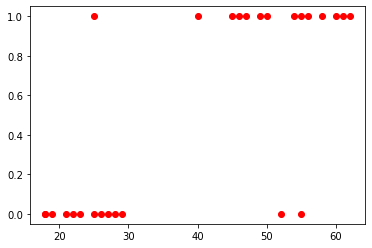

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.age, df.bought_insurance, c = 'r')

In [6]:
print(df.shape)

(27, 2)


In [7]:
x = df[['age']]   # double brackets because x should always be in multi-dimensional array
print(x)

    age
0    22
1    25
2    47
3    52
4    46
5    56
6    55
7    60
8    62
9    61
10   18
11   28
12   27
13   29
14   49
15   55
16   25
17   58
18   19
19   18
20   21
21   26
22   40
23   45
24   50
25   54
26   23


In [8]:
y = df.bought_insurance
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
model = train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1)

In [10]:
x_train

,age
25,54
19,18
2,47
10,18
11,28
1,25
8,62
26,23
5,56
17,58


In [11]:
x_test

,age
21,26
20,21
16,25


In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(x_train, y_train)

LogisticRegression()

In [14]:
model.predict(x_test)

array([0, 0, 0], dtype=int64)

In [15]:
model.score(x_test, y_test)

0.6666666666666666

In [16]:
model.predict_proba(x_test)  # tells us the probability of outcome

array([[0.92453532, 0.07546468],
       [0.9656572 , 0.0343428 ],
       [0.93534104, 0.06465896]])

In [17]:
model.predict([[56]])

array([1], dtype=int64)

In [18]:
model.predict([[25]])

array([0], dtype=int64)

In [19]:
# MULTI CLASS CLASSIFICATION

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()


In [21]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [22]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

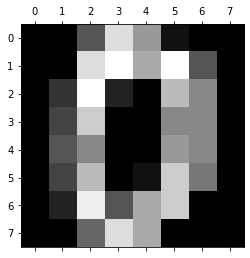

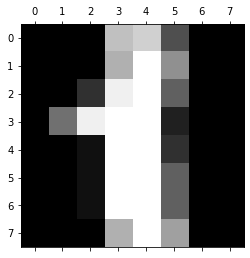

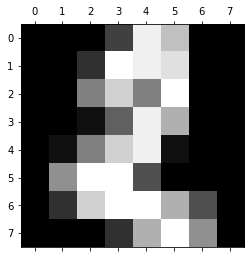

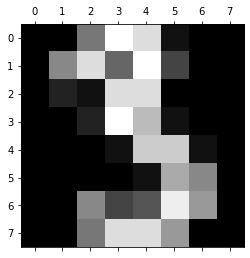

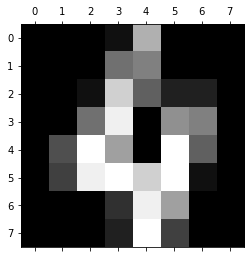

In [23]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [24]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [26]:
len(x_train)

1437

In [27]:
len(x_test)

360

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [29]:
model.fit(x_train, y_train)


C:\Users\atmik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.score(x_test, y_test)

0.9527777777777777

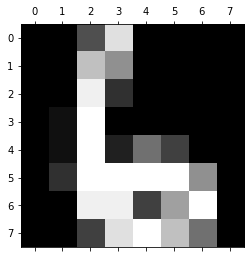

In [31]:
plt.matshow(digits.images[67])

In [32]:
digits.target[67]

6

In [33]:
model.predict([digits.data[67]])

array([6])

In [34]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [35]:
y_predicted = model.predict(x_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 35  1  0  0  0  0  0  2  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 30  0  1  0  0  0  0]
 [ 0  1  0  0 31  0  0  0  1  0]
 [ 0  1  1  0  0 37  0  0  0  1]
 [ 0  1  0  0  0  1 37  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  1]
 [ 0  1  1  0  0  0  0  0 27  0]
 [ 0  1  0  0  0  0  0  0  1 32]]


Text(69.0, 0.5, 'Truth')

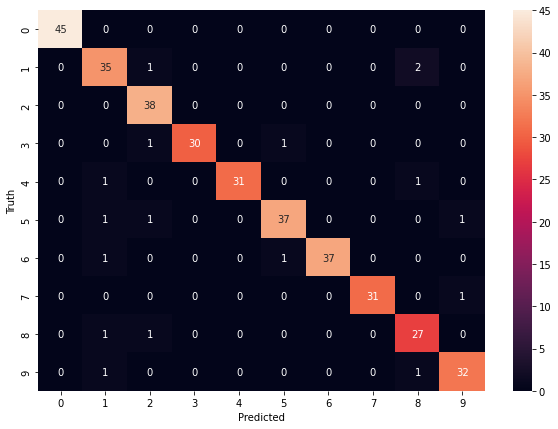

In [36]:
import seaborn as sb
plt.figure(figsize = (10,7))

sb.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')